# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [16]:
#Empty data frame created to be filled by API calls
city_df = pd.DataFrame ({'City': [],
                        'Cloudiness': [],
                        'Country': [],
                        'Date': [],
                        'Humidity': [],
                        'Lat': [],
                        'Lon':[],
                        'Max Temp': [],
                        'Wind Speed': []
                        })
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Perform a weather check on each city using a series of successive API calls.
url = 'http://api.openweathermap.org/data/2.5/weather?'
# For temperature in Fahrenheit use units=imperial
units = 'imperial'

query_url = f'{url}appid={weather_api_key}&units={units}&q='

print('Data Retrieval')

sets = 1
max_calls = 10
records = 1

for i in cities:
    try:
        response = requests.get(query_url + i).json()
        
        city_df = city_df.append({'City': response['name'],
                        'Cloudiness': response['clouds']['all'],
                        'Country': response['sys']['country'],
                        'Date': response['dt'],
                        'Humidity': response['main']['humidity'],
                        'Lat': response['coord']['lat'],
                        'Lon':response['coord']['lon'],
                        'Max Temp': response['main']['temp_max'],
                        'Wind Speed': response['wind']['speed']}, ignore_index = True
                        )


        results = response ['name']
        print(f'Processing {records} of Set {sets} and {results}')
        
        records += 1
        
        if records == max_calls:
            sets += 1
            records = 1
        
    except (KeyError, IndexError):
        print('City not found, skipping...')
        
print('Data Retrieval Complete')
        

Data Retrieval
Processing 1 of Set 1 and Karratha
Processing 2 of Set 1 and Dartford
Processing 3 of Set 1 and Pamplona
Processing 4 of Set 1 and Katsuura
Processing 5 of Set 1 and Puerto Ayora
Processing 6 of Set 1 and Ohafia
Processing 7 of Set 1 and Vaini
Processing 8 of Set 1 and Cayenne
Processing 9 of Set 1 and Punta Arenas
Processing 1 of Set 2 and Abnūb
City not found, skipping...
Processing 2 of Set 2 and Mildura
Processing 3 of Set 2 and Santa Cruz de Tenerife
Processing 4 of Set 2 and Malanje
Processing 5 of Set 2 and Jamestown
City not found, skipping...
Processing 6 of Set 2 and Ushuaia
Processing 7 of Set 2 and San Cristobal
City not found, skipping...
Processing 8 of Set 2 and Mataura
Processing 9 of Set 2 and Rikitea
Processing 1 of Set 3 and Cape Town
Processing 2 of Set 3 and Road Town
Processing 3 of Set 3 and Atuona
Processing 4 of Set 3 and Kapaa
Processing 5 of Set 3 and Westerland
Processing 6 of Set 3 and Saint-Philippe
Processing 7 of Set 3 and Esim
Processing 

Processing 4 of Set 24 and Sitka
Processing 5 of Set 24 and Hengshui
Processing 6 of Set 24 and Mugumu
Processing 7 of Set 24 and Kumul
Processing 8 of Set 24 and Doka
City not found, skipping...
Processing 9 of Set 24 and Pacific Grove
City not found, skipping...
Processing 1 of Set 25 and Leshukonskoye
Processing 2 of Set 25 and Kondinskoye
Processing 3 of Set 25 and Bulgan
Processing 4 of Set 25 and Omboué
City not found, skipping...
Processing 5 of Set 25 and Hong Kong
Processing 6 of Set 25 and Nanortalik
Processing 7 of Set 25 and Cairns
City not found, skipping...
Processing 8 of Set 25 and Kaitangata
Processing 9 of Set 25 and Erzin
Processing 1 of Set 26 and Kaeng Khoi
Processing 2 of Set 26 and Barra do Garças
Processing 3 of Set 26 and Salaga
Processing 4 of Set 26 and North Bend
Processing 5 of Set 26 and Ostrovnoy
Processing 6 of Set 26 and Juba
Processing 7 of Set 26 and Beeskow
Processing 8 of Set 26 and El Ejido
Processing 9 of Set 26 and Biankouma
Processing 1 of Set 2

Processing 6 of Set 47 and Fairbanks
Processing 7 of Set 47 and Shatsk
Processing 8 of Set 47 and Goba
Processing 9 of Set 47 and Sawākin
Processing 1 of Set 48 and San
Processing 2 of Set 48 and Pozo Colorado
Processing 3 of Set 48 and Talara
Processing 4 of Set 48 and Aasiaat
Processing 5 of Set 48 and Kiryat Gat
Processing 6 of Set 48 and Bowmore
Processing 7 of Set 48 and Eirunepé
Processing 8 of Set 48 and Sol'vychegodsk
Processing 9 of Set 48 and Jiuquan
Processing 1 of Set 49 and Shingū
Processing 2 of Set 49 and Chililabombwe
Processing 3 of Set 49 and Yerbogachën
Processing 4 of Set 49 and Miami
Processing 5 of Set 49 and Sørland
Processing 6 of Set 49 and Tainan City
Processing 7 of Set 49 and Santa Cruz
Processing 8 of Set 49 and Povenets
Processing 9 of Set 49 and Sisimiut
Processing 1 of Set 50 and Kapit
Processing 2 of Set 50 and Abalak
Processing 3 of Set 50 and Mmabatho
Processing 4 of Set 50 and Kanniyākumāri
Processing 5 of Set 50 and Grand Gaube
Processing 6 of Set 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
city_df['Date'] = pd.to_datetime(city_df['Date'], unit ='s')

In [36]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Karratha,95.0,AU,2020-04-20 03:33:50,51.0,-20.74,116.85,87.69,9.84
1,Karratha,95.0,AU,2020-04-20 03:33:50,51.0,-20.74,116.85,87.69,9.84
2,Dartford,0.0,GB,2020-04-20 03:30:02,81.0,51.44,0.22,46.00,3.36
3,Pamplona,90.0,ES,2020-04-20 03:34:34,93.0,42.82,-1.64,53.01,5.82
4,Katsuura,75.0,JP,2020-04-20 03:34:34,93.0,35.13,140.30,55.40,11.41


In [37]:
pd.to_numeric(city_df["Cloudiness"]).astype(float)
pd.to_numeric(city_df["Humidity"]).astype(float)
pd.to_numeric(city_df["Lat"]).astype(float)
pd.to_numeric(city_df["Lon"]).astype(float)
pd.to_numeric(city_df["Max Temp"]).astype(float)
pd.to_numeric(city_df["Wind Speed"]).astype(float)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Karratha,95.0,AU,2020-04-20 03:33:50,51.0,-20.74,116.85,87.69,9.84
1,Karratha,95.0,AU,2020-04-20 03:33:50,51.0,-20.74,116.85,87.69,9.84
2,Dartford,0.0,GB,2020-04-20 03:30:02,81.0,51.44,0.22,46.00,3.36
3,Pamplona,90.0,ES,2020-04-20 03:34:34,93.0,42.82,-1.64,53.01,5.82
4,Katsuura,75.0,JP,2020-04-20 03:34:34,93.0,35.13,140.30,55.40,11.41


In [38]:
city_df.count()

City          896
Cloudiness    896
Country       896
Date          896
Humidity      896
Lat           896
Lon           896
Max Temp      896
Wind Speed    896
dtype: int64

In [39]:
city_df.to_csv('city_df.csv')

## Inspect the data and remove the cities where the humidity > 100%. (note: there was no data with humidity > 100%)
----
## Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

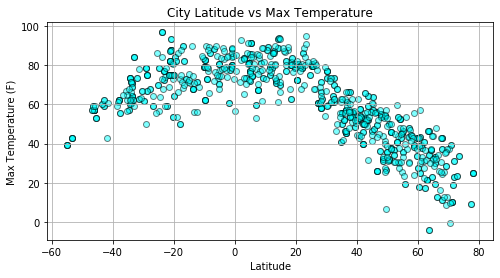

Data analysis: The graph shows that as one moves away from the equator, the temperature drops.


In [75]:
# Plot Latitude vs Temperature
plt.figure(figsize=(8,4))
plt.scatter(city_df["Lat"], city_df["Max Temp"], color='cyan', alpha=0.5, edgecolors= 'black' )
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature")
plt.savefig('latitude_temp_plot.png')
plt.show()
print (f'Data analysis: The graph shows that as one moves away from the equator, the temperature drops.')

## Latitude vs. Humidity Plot

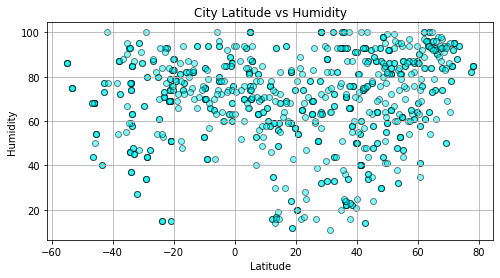

Data analysis: This graph indicates no significant correlation between latitude and humidity.


In [76]:
plt.figure(figsize=(8,4))
plt.scatter(city_df["Lat"], city_df["Humidity"], color='cyan', alpha=0.5, edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Humidity")
plt.title(f"City Latitude vs Humidity")
plt.savefig('latitude_humidity_plot.png')
plt.show()
print(f"Data analysis: This graph indicates no significant correlation between latitude and humidity.")

## Latitude vs. Cloudiness Plot

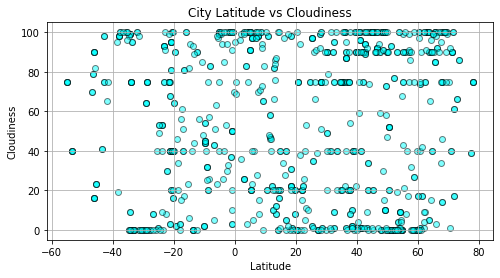

Data analysis: This graph indicates no significant correlation between Latitude and Cloudiness


In [77]:
plt.figure(figsize=(8,4))
plt.scatter(city_df["Lat"], city_df["Cloudiness"], color='cyan', alpha=0.5, edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Cloudiness")
plt.title(f"City Latitude vs Cloudiness")
plt.savefig('latitude_cloudiness_plot.png')
plt.show()
print(f"Data analysis: This graph indicates no significant correlation between Latitude and Cloudiness")

## Latitude vs. Wind Speed Plot

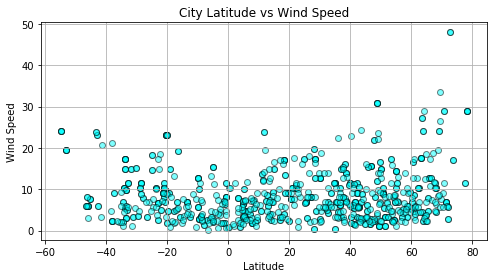

Data analysis: This graph indicates no significant correlation between Latitude and Wind Speed


In [78]:
plt.figure(figsize=(8,4))
plt.scatter(city_df["Lat"], city_df["Wind Speed"], color='cyan', alpha=0.5, edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Wind Speed")
plt.title(f"City Latitude vs Wind Speed")
plt.savefig('latitude_windspeed_plot.png')
plt.show()
print(f"Data analysis: This graph indicates no significant correlation between Latitude and Wind Speed")

## OPTIONAL: Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


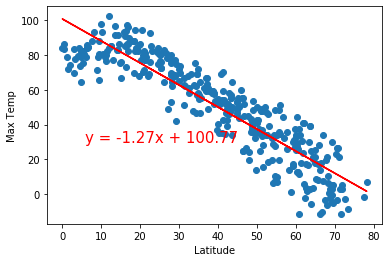

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


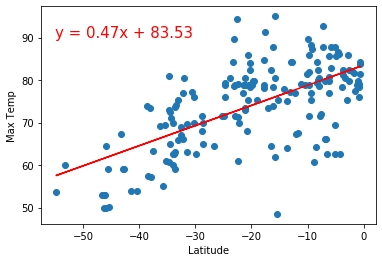

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


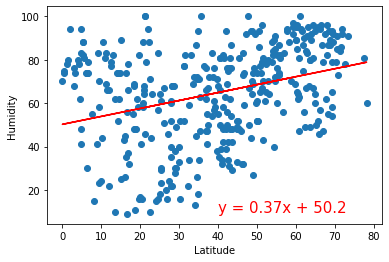

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


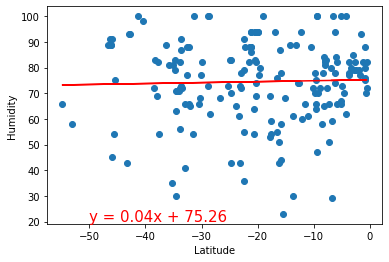

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


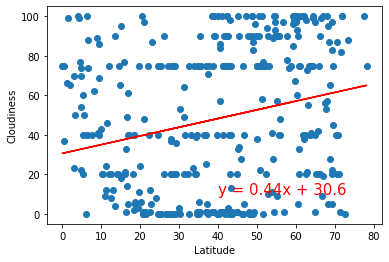

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


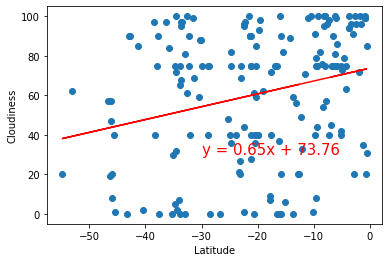

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


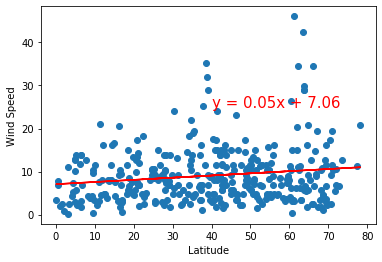

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


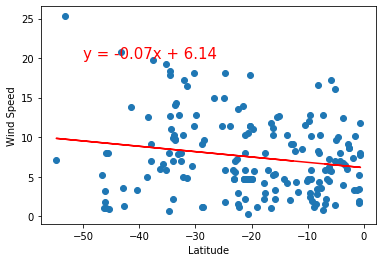